In [35]:
# Plot the Multi-endpoint acute toxicity performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
from scipy.interpolate import interp1d

In [36]:
df = pd.read_csv('./table_results/MTL_results_on_all_endpoints.csv')

In [37]:
df.columns

Index(['Task', 'MT-DNN-RMSE', 'MT-DNN-R2', 'ST-DNN-RMSE', 'ST-DNN-R2',
       'ST-RF-RMSE', 'ST-RF-R2', 'GCNN-RMSE', 'GCNN-R2', 'DLCA-RMSE',
       'DLCA-R2', 'MT-NYAN-RMSE (single latent)', 'MT-NYAN-R2 (single latent)',
       'MT-NYAN-RMSE (5 random latents)', 'MT-NYAN-R2 (5 random latents)'],
      dtype='object')

In [38]:
endpoints = df['Task'].values[:59]

MT_DNN_RMSE = df['MT-DNN-RMSE'].values[:59]
MT_DNN_RMSE_avg = MT_DNN_RMSE.mean()
MT_DNN_R2 = df['MT-DNN-R2'].values[:59]
MT_DNN_R2_avg = MT_DNN_R2.mean()

ST_DNN_RMSE = df['ST-DNN-RMSE'].values[:59]
ST_DNN_RMSE_avg = ST_DNN_RMSE.mean()
ST_DNN_R2 = df['ST-DNN-R2'].values[:59]
ST_DNN_R2_avg = ST_DNN_R2.mean()

ST_RF_RMSE = df['ST-RF-RMSE'].values[:59]
ST_RF_RMSE_avg = ST_RF_RMSE.mean()
ST_RF_R2 = df['ST-RF-R2'].values[:59]
ST_RF_R2_avg = ST_RF_R2.mean()

GCNN_RMSE = df['GCNN-RMSE'].values[:59]
GCNN_RMSE_avg = GCNN_RMSE.mean()
GCNN_R2 = df['GCNN-R2'].values[:59]
GCNN_R2_avg = GCNN_R2.mean()

DLCA_RMSE = df['DLCA-RMSE'].values[:59]
DLCA_RMSE_avg = DLCA_RMSE.mean()
DLCA_R2 = df['DLCA-R2'].values[:59]
DLCA_R2_avg = DLCA_R2.mean()

MT_NYAN_RMSE_single = df['MT-NYAN-RMSE (single latent)'].values[:59]
MT_NYAN_RMSE_single_avg = MT_NYAN_RMSE_single.mean()
MT_NYAN_R2_single = df['MT-NYAN-R2 (single latent)'].values[:59]
MT_NYAN_R2_single_avg = MT_NYAN_R2_single.mean()

MT_NYAN_RMSE_5_latents = df['MT-NYAN-RMSE (5 random latents)'].values[:59]
MT_NYAN_RMSE_5_latents_avg = MT_NYAN_RMSE_5_latents.mean()
MT_NYAN_R2_5_latents = df['MT-NYAN-R2 (5 random latents)'].values[:59]
MT_NYAN_R2_5_latents_avg = MT_NYAN_R2_5_latents.mean()

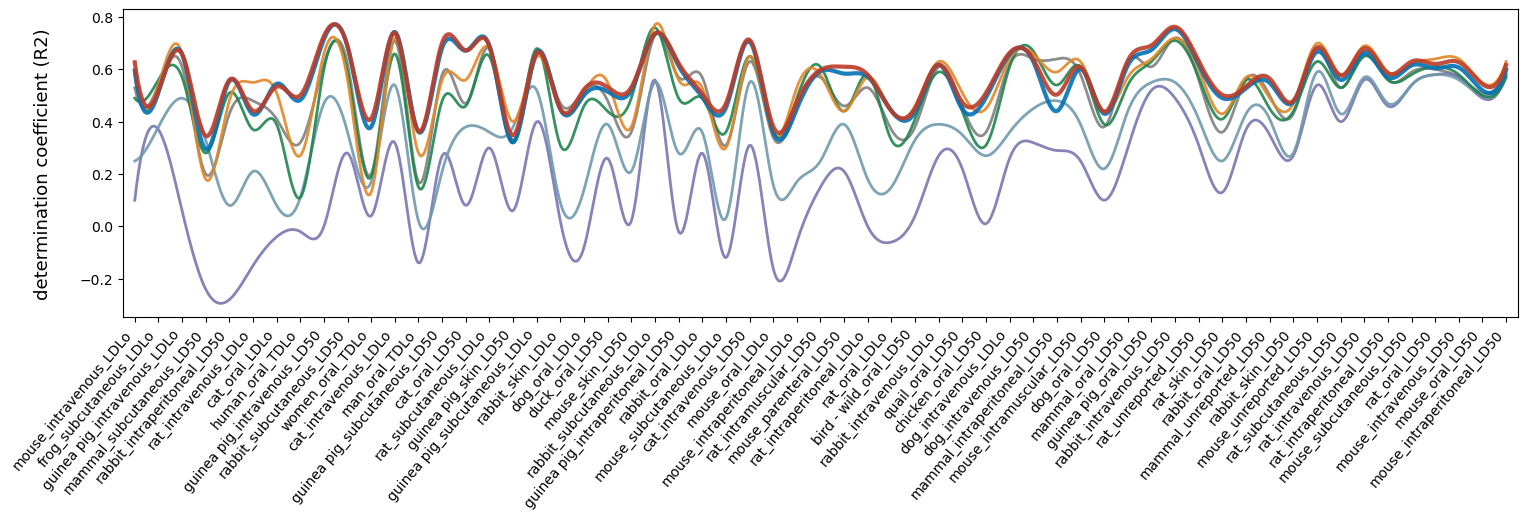

In [40]:
# smooth  R2
x = np.array(range(0,59))
f_MT_DNN_R2 = interp1d(x, MT_DNN_R2, kind='cubic')
f_ST_DNN_R2 = interp1d(x, ST_DNN_R2, kind='cubic')
f_ST_RF_R2 = interp1d(x, ST_RF_R2, kind='cubic')
f_GCNN_R2 = interp1d(x, GCNN_R2, kind='cubic')
f_DLCA_R2 = interp1d(x, DLCA_R2, kind='cubic')
f_MT_NYAN_R2_single = interp1d(x, MT_NYAN_R2_single, kind='cubic')
f_MT_NYAN_R2_5_latents = interp1d(x, MT_NYAN_R2_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_R2 = f_MT_DNN_R2(x)
new_ST_DNN_R2 = f_ST_DNN_R2(x)
new_ST_RF_R2 = f_ST_RF_R2(x)
new_GCNN_R2 = f_GCNN_R2(x)
new_DLCA_R2 = f_DLCA_R2(x)
new_MT_NYAN_R2_single = f_MT_NYAN_R2_single(x)
new_MT_NYAN_R2_5_latents = f_MT_NYAN_R2_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_R2, '-', c='gray', label='MT-DNN', linewidth=2, alpha=0.9)
ax1.plot(x, new_ST_DNN_R2, '-',c='#7876B1CC', label='ST-DNN',linewidth=2, alpha=0.9)
ax1.plot(x, new_ST_RF_R2, '-',c='#6F99ADCC', label='ST-RF',linewidth=2, alpha=0.9)
ax1.plot(x, new_GCNN_R2, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_DLCA_R2, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.9)
ax1.plot(x, new_MT_NYAN_R2_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.9)
ax1.plot(x, new_MT_NYAN_R2_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.9)

# ax1.legend()
ax1.set_ylabel('determination coefficient (R2)',fontsize=13,labelpad=20)
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks(range(0,59,1))
ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
# plt.legend(fontsize=9.5)
fig.savefig('figures/MTL_59endpoint(R2).pdf', bbox_inches='tight', pad_inches=0.1)

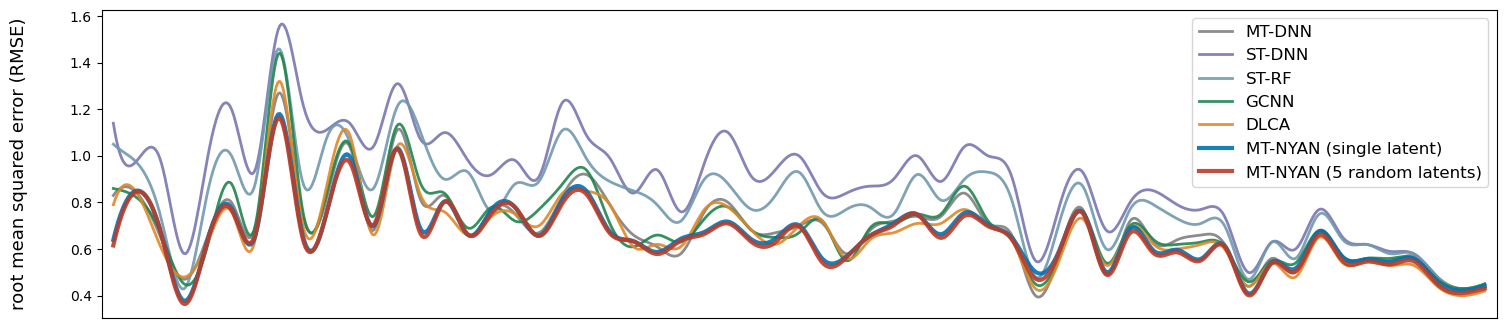

In [41]:
# smooth  RMSE
x = np.array(range(0,59))
f_MT_DNN_RMSE = interp1d(x, MT_DNN_RMSE, kind='cubic')
f_ST_DNN_RMSE = interp1d(x, ST_DNN_RMSE, kind='cubic')
f_ST_RF_RMSE = interp1d(x, ST_RF_RMSE, kind='cubic')
f_GCNN_RMSE = interp1d(x, GCNN_RMSE, kind='cubic')
f_DLCA_RMSE = interp1d(x, DLCA_RMSE, kind='cubic')
f_MT_NYAN_RMSE_single = interp1d(x, MT_NYAN_RMSE_single, kind='cubic')
f_MT_NYAN_RMSE_5_latents = interp1d(x, MT_NYAN_RMSE_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_RMSE = f_MT_DNN_RMSE(x)
new_ST_DNN_RMSE = f_ST_DNN_RMSE(x)
new_ST_RF_RMSE = f_ST_RF_RMSE(x)
new_GCNN_RMSE = f_GCNN_RMSE(x)
new_DLCA_RMSE = f_DLCA_RMSE(x)
new_MT_NYAN_RMSE_single = f_MT_NYAN_RMSE_single(x)
new_MT_NYAN_RMSE_5_latents = f_MT_NYAN_RMSE_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_RMSE, '-', c='gray', label='MT-DNN', linewidth=2,alpha=0.9)
ax1.plot(x, new_ST_DNN_RMSE, '-',c='#7876B1CC', label='ST-DNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_ST_RF_RMSE, '-',c='#6F99ADCC', label='ST-RF',linewidth=2,alpha=0.9)
ax1.plot(x, new_GCNN_RMSE, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_DLCA_RMSE, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.9)
ax1.plot(x, new_MT_NYAN_RMSE_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.9)
ax1.plot(x, new_MT_NYAN_RMSE_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.9)

ax1.legend()
ax1.set_ylabel('root mean squared error (RMSE)',fontsize=13,labelpad=30)
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks([])
# ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
plt.legend(fontsize=12)
fig.savefig('figures/MTL_59endpoint(RMSE).pdf', bbox_inches='tight', pad_inches=0.1)

In [190]:
RMSE = [[0.72, 0.72, 0.66, 0.67, 0.68],
        [0.90, 0.96, 0.84, 0.87, 0.87],
        [0.84, 0.86, 0.76, 0.79, 0.79],
        [0.73, 0.74, 0.67, 0.67, 0.70],
        [0.70, 0.71, 0.64, 0.66, 0.66],
        [0.65, 0.66, 0.63, 0.68, 0.68],
        [0.64, 0.65, 0.62, 0.68, 0.67],]

R2   = [[0.51, 0.50, 0.52, 0.52, 0.51],
        [0.25, 0.13, 0.23, 0.21, 0.19],
        [0.34, 0.31, 0.38, 0.36, 0.34],
        [0.50, 0.48, 0.50, 0.53, 0.49],
        [0.54, 0.51, 0.55, 0.55, 0.54],
        [0.56, 0.55, 0.57, 0.54, 0.56],
        [0.58, 0.56, 0.59, 0.55, 0.57],]
methods = ['MT-DNN', 'ST-DNN', 'ST-RF','GCNN', 'DCLA', 'MT-NYAN (single latent)','MT-NYAN (5 random latents)']

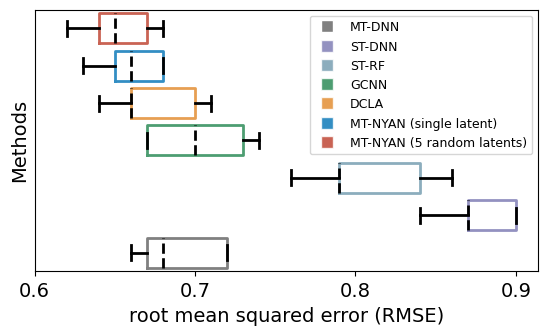

In [233]:
colors = ['gray','#7876B1CC','#6F99ADCC','#20854ECC','#E18727CC','#0072B5CC','#BC3C29CC']
figure, ax = plt.subplots(figsize=(6.5,3.4))
bp = ax.boxplot(RMSE,vert=False, showfliers=False, widths=0.8)

for box, color in zip(bp['boxes'], colors): 
    box.set(color=color, linewidth=2)

for median in bp['medians']:
    median.set(color='black',linestyle='--', linewidth=2)

for whisker, cap in zip(bp['whiskers'], bp['caps']):
    whisker.set(color='black', linestyle='-', linewidth=2)
    cap.set(color='black', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='.', markeredgecolor='black', markerfacecolor='none', markersize=8, linewidth=2)
ax.set_xlabel('root mean squared error (RMSE)',fontsize=14, labelpad=5)
ax.set_ylabel('Methods',fontsize=14)
ax.set_yticks([])
ax.set_xticks([0.6,0.7,0.8,0.9])
ax.set_xticklabels([0.6,0.7,0.8,0.9], fontsize=14)

legend_patches = [plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=color, markersize=8, linewidth=2) for color in colors]
labels = methods
plt.legend(legend_patches, labels, fontsize=9)

figure.savefig('figures/MTL_box_RMSE.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

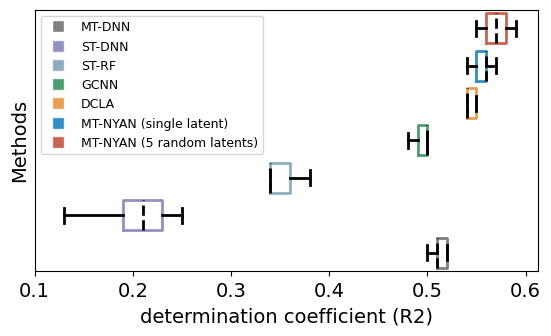

In [232]:
colors = ['gray','#7876B1CC','#6F99ADCC','#20854ECC','#E18727CC','#0072B5CC','#BC3C29CC']
figure, ax = plt.subplots(figsize=(6.5,3.4))
bp = ax.boxplot(R2,vert=False, showfliers=False, widths=0.8)

for box, color in zip(bp['boxes'], colors): 
    box.set(color=color, linewidth=2)

for median in bp['medians']:
    median.set(color='black',linestyle='--', linewidth=2)

for whisker, cap in zip(bp['whiskers'], bp['caps']):
    whisker.set(color='black', linestyle='-', linewidth=2)
    cap.set(color='black', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='.', markeredgecolor='black', markerfacecolor='none', markersize=8, linewidth=2)
ax.set_xlabel('determination coefficient (R2)',fontsize=14, labelpad=5)
ax.set_ylabel('Methods',fontsize=14)
ax.set_yticks([])
ax.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_xticklabels([0.1,0.2,0.3,0.4,0.5,0.6], fontsize=14)

legend_patches = [plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=color, markersize=8, linewidth=2) for color in colors]
labels = methods
plt.legend(legend_patches, labels, fontsize=9)

figure.savefig('figures/MTL_box_R2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()